In [65]:
# dependencies and setup
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
# defining data path
data_path=Path('resources/Asthma_Emergency_Department_Visit_Rates_by_ZIP_Code.csv')
# Reading data source using pandas
asthma_df=pd.read_csv(data_path)

In [46]:
# looking for dataframe
asthma_df.head()

,Year,ZIP code,Age Group,Number of Visits,Age-adjusted rate,County Fips code,County
0,2012,"90001\n(33.973271508000494, -118.24896959899968)",AllAges,433.0,76.2,6037,LOS ANGELES
1,2012,"90001\n(33.973271508000494, -118.24896959899968)",Children (0-17),221.0,108.6,6037,LOS ANGELES
2,2012,"90001\n(33.973271508000494, -118.24896959899968)",Adults (18+),212.0,64.9,6037,LOS ANGELES
3,2012,"90002\n(33.94895251300045, -118.24697958699971)",AllAges,438.0,78.2,6037,LOS ANGELES
4,2012,"90002\n(33.94895251300045, -118.24697958699971)",Children (0-17),215.0,113.3,6037,LOS ANGELES


In [47]:
#info of dataframe
asthma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               7086 non-null   int64  
 1   ZIP code           7086 non-null   object 
 2   Age Group          7086 non-null   object 
 3   Number of Visits   6498 non-null   float64
 4   Age-adjusted rate  6498 non-null   float64
 5   County Fips code   7086 non-null   int64  
 6   County             7086 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 387.6+ KB


In [48]:
#looking for age group dataframe
asthma_df['Age Group'].value_counts()

Children (0-17)    2362
Adults (18+)       2362
AllAges            1184
All Ages           1178
Name: Age Group, dtype: int64

In [49]:
#checking nan value
asthma_df.isna().sum()

Year                   0
ZIP code               0
Age Group              0
Number of Visits     588
Age-adjusted rate    588
County Fips code       0
County                 0
dtype: int64

In [50]:
#filling nan with 0
asthma_df.fillna(0, inplace=True)

In [51]:
#cleaning age group column
to_replace={'Children (0-17)': 'Child',
            'Adults (18+)':'Adults',
            'AllAges': 'Adults',
            'All Ages': 'Child'}
asthma_df['Age Group']=asthma_df['Age Group'].replace(to_replace)

In [52]:
#making county column capatilize
asthma_df['County']=asthma_df['County'].str.capitalize()

In [53]:
asthma_df['Zip_code']=asthma_df['ZIP code'].str.split("\n", expand=True).get(0)

In [55]:
asthma_df[['Lat','Lng']]=asthma_df['ZIP code'].str.split("\n", expand=True).get(1).str.split(',', expand=True)
#Remove paranthesis from lat and lon
asthma_df['Lat'] = asthma_df['Lat'].str[1:]
asthma_df['Lng'] = asthma_df['Lng'].str[:-1]

In [59]:
asthma_df.drop('ZIP code', axis=1, inplace=True)

In [60]:
asthma_df.columns

Index(['Year', 'Age Group', 'Number of Visits', 'Age-adjusted rate',
       'County Fips code', 'County', 'Zip_code', 'Lat', 'lng', 'Lng'],
      dtype='object')

In [61]:
#rearranging columns
asthma_df=asthma_df[['Year', 'Zip_code', 'County', 'Lat', 'Lng', 'Age Group', 'Number of Visits', 'Age-adjusted rate',
       'County Fips code']]

In [66]:
#renaming columns
asthma_df.rename(columns={'Age Group':'Age_group',
                         'Number of Visits':'Number_of_visits',
                         'Age-adjusted rate':'Age-adjusted-rate',
                         'County Fips code':'County-fips-code'}, inplace=True)

In [74]:
asthma_df["Zip_code"]=asthma_df["Zip_code"].astype('int')
asthma_df[["Lat", "Lng"]]=asthma_df[["Lat", "Lng"]].astype('float')

In [75]:
asthma_df

,Year,Zip_code,County,Lat,Lng,Age_group,Number_of_visits,Age-adjusted-rate,County-fips-code
0,2012,90001,Los angeles,33.973272,-118.248970,Adults,433.0,76.200000,6037
1,2012,90001,Los angeles,33.973272,-118.248970,Child,221.0,108.600000,6037
2,2012,90001,Los angeles,33.973272,-118.248970,Adults,212.0,64.900000,6037
3,2012,90002,Los angeles,33.948953,-118.246980,Adults,438.0,78.200000,6037
4,2012,90002,Los angeles,33.948953,-118.246980,Child,215.0,113.300000,6037
...,...,...,...,...,...,...,...,...,...
7081,2009,96150,El dorado,38.915040,-119.994519,Child,16.0,19.176574,6017
7082,2009,96150,El dorado,38.915040,-119.994519,Adults,26.0,8.929906,6017
7083,2009,96161,Nevada,39.340047,-120.189319,Child,16.0,8.646950,6057
7084,2009,96161,Nevada,39.340047,-120.189319,Child,0.0,0.000000,6057


In [76]:
# looking dtype
asthma_df.dtypes

Year                   int64
Zip_code               int64
County                object
Lat                  float64
Lng                  float64
Age_group             object
Number_of_visits     float64
Age-adjusted-rate    float64
County-fips-code       int64
dtype: object

In [78]:
#correlation of all columns
corr=asthma_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Zip_code,Lat,Lng,Number_of_visits,Age-adjusted-rate,County-fips-code
Year,1.000000,0.006927,0.006690,-0.007650,-0.002418,0.015297,-0.002579
Zip_code,0.006927,1.000000,0.881220,-0.791757,-0.119942,0.001385,0.189221
Lat,0.006690,0.881220,1.000000,-0.915319,-0.091432,0.033901,0.006356
Lng,-0.007650,-0.791757,-0.915319,1.000000,0.079449,0.023482,-0.016385
Number_of_visits,-0.002418,-0.119942,-0.091432,0.079449,1.000000,0.338194,-0.099515
Age-adjusted-rate,0.015297,0.001385,0.033901,0.023482,0.338194,1.000000,-0.140787
County-fips-code,-0.002579,0.189221,0.006356,-0.016385,-0.099515,-0.140787,1.000000


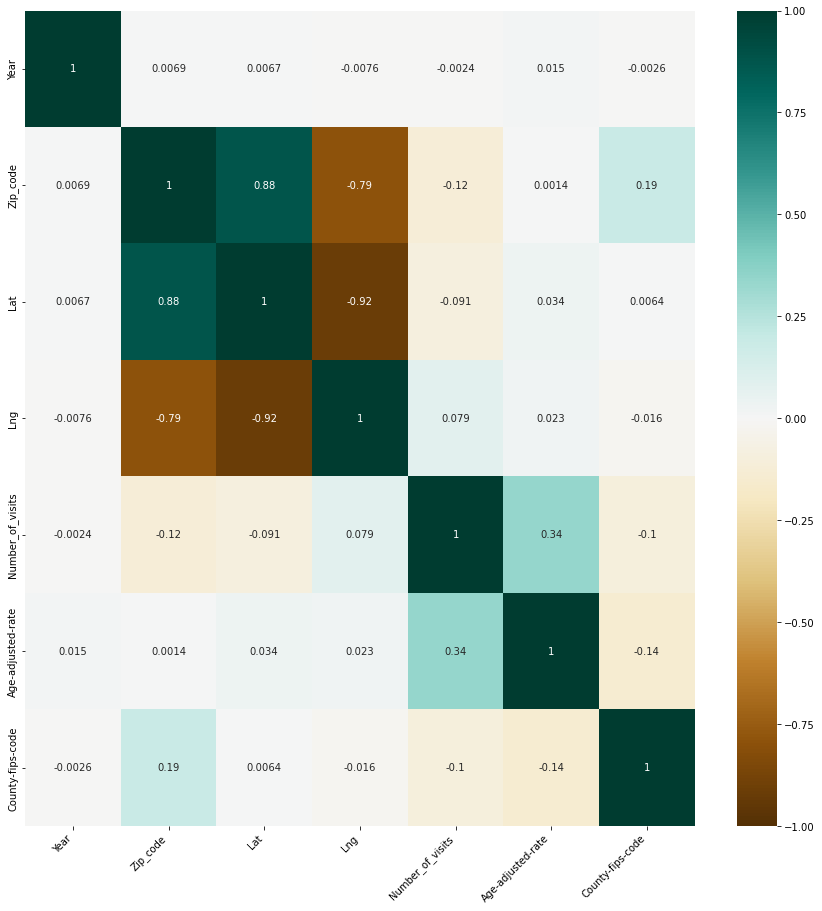

In [79]:
#plotting using seaborn heatmap
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,vmin=-1, vmax=1, ax=ax, cmap='BrBG',annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,
                       horizontalalignment='right')
plt.show()

In [77]:
#saving the cleaned file
asthma_df.to_csv('resources/Cleaned_folder/asthma.csv', index=False)